MSE= 168672.65259404902
intercept_= 7.160658792296772
coef_= [-5.47656769  0.45968485  0.08226155]


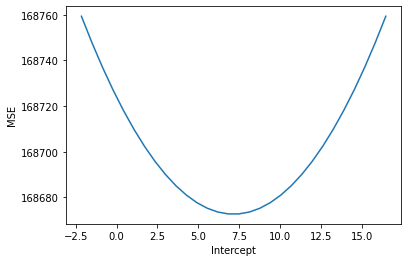

In [1]:
# DESCRIÇÃO DO EXERCÍCIO 02

# Aluno: Wekler Mendes Sarmento

#  1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

#  2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

#  3. Calcule o MSE (erro quadrático médio) para todos os exemplos da base usada como treino no modelo treinado;

#  4. Plote em um gráfico (2D) o MSE em função do atributo intercept da classe LinearRegression. Mantenha os valores do atributo coef fixos e varie o valor de intercept entre intercept - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

#  5. Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).


#==================================================================================================================================================================================
# Importando as dependências do código
#==================================================================================================================================================================================
# Instalando o pandas para trabalhar com a leitura de arquivos csv (abrir o terminal e instalar o pandaspip install pandas)
import pandas as pd # Importando a dependêcia para leitura do csv
import numpy as np # Trabalhar com algebra linear
import matplotlib.pyplot as plt #Será utilizado para montar os gráficos
from sklearn.metrics import mean_squared_error #Para calcular o MSE
from sklearn.linear_model import LinearRegression # Regressão linear

#==================================================================================================================================================================================
#BASE DE DADOS
#==================================================================================================================================================================================
# Nome: Parking Birmingham Data Set
    # Descrição da base de dados: https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#
    # Link direto para download da base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
    # Nome do arquivo descompactado e utilizado como base de dados: dataset.csv
    # Objetivo: Predizer a quantidade de ocupação no estacionamento da cidade de Birmingham
#=================================================================================================================================================================================

todos_dados = pd.read_csv ("dataset.csv")# Lendo os dados do arquivo e colocando na variavel todos_dados

# Definindo a função que irá preparar os dados de forma a substituir os conteúdos, que se já não são, por valores numéricos (fonte: https://www.kaggle.com/afrniomelo/epv-peq-aula-1-regress-o)

def pre_processamento (df):
    
    new_df = pd.DataFrame()
    
    for n,c in df.items():
                
        if pd.api.types.is_numeric_dtype(c):
            # substituindo NaN numericos pelas medianas de cada coluna
            new_df[n] = c.fillna(value=c.median())
        else:
            # interpretando o que nao for numerico como variaveis categoricas 
            # e transformando cada categoria em um numero
            new_df[n] = pd.Categorical(c.astype('category').cat.as_ordered()).codes
    
    return new_df

todos_dados_proc = pre_processamento(todos_dados)


#==================================================================================================================================================================================
# Separando os dados X e y
#==================================================================================================================================================================================
X, y = todos_dados_proc.drop('Occupancy', axis=1), todos_dados_proc['Occupancy']

X = X.to_numpy() # Transformando para array
y = y.to_numpy() # Transformando para array


#==================================================================================================================================================================================
# TREINANDO O MODELO E IMPRIMINDO OS VALORES DO mse, intercept e coef
#==================================================================================================================================================================================
modelo = LinearRegression() #Criando o modelo

modelo.fit(X, y) #Treinando a base de dados

ypred = modelo.predict(X) #Criando o ypred

#Imprimindo as variáveis para ter noção dos valores
print("MSE=", mean_squared_error(y, ypred)) 
print("intercept_=", modelo.intercept_)
print("coef_=", modelo.coef_)

#==================================================================================================================================================================================
# PLOTANDO O GRÁFICO COM VARIAÇÃO NO INTERCEPT
#==================================================================================================================================================================================

variacao1 = modelo.intercept_ - (modelo.intercept_ * 1.3) # Variação de 30% para menos em relação ao intercept
variacao2 = modelo.intercept_ + (modelo.intercept_ * 1.3) # Variação de 30% para mais em relação ao intercept

W0 = np.linspace(variacao1, variacao2,30) # Variação do gráfico no eixo X

Erro = np.empty(W0.shape) # Criando a variável para guardar o cálculo do erro

for i in range(Erro.shape[0]):
    modelo.intercept_ = W0[i]    
    ypred = modelo.predict(X)
    Erro[i]  = mean_squared_error(y, ypred)

plt.xlabel("Intercept")
plt.ylabel("MSE")
plt.plot(W0, Erro)

